In [2]:
import pandas as pd
import numpy as np
import requests
from setting import DB_INFO
from sqlalchemy.engine import create_engine
pd.options.display.max_columns = 100
%matplotlib inline

In [5]:
url = 'https://covidtracking.com/data/download/california-history.csv'

# Get the json data
r = requests.get(url)

cur = create_engine(DB_INFO)

In [6]:
r.content

b'"date","state","death","deathConfirmed","deathIncrease","deathProbable","hospitalized","hospitalizedCumulative","hospitalizedCurrently","hospitalizedIncrease","inIcuCumulative","inIcuCurrently","negative","negativeIncrease","negativeTestsAntibody","negativeTestsPeopleAntibody","negativeTestsViral","onVentilatorCumulative","onVentilatorCurrently","positive","positiveCasesViral","positiveIncrease","positiveScore","positiveTestsAntibody","positiveTestsAntigen","positiveTestsPeopleAntibody","positiveTestsPeopleAntigen","positiveTestsViral","recovered","totalTestEncountersViral","totalTestEncountersViralIncrease","totalTestResults","totalTestResultsIncrease","totalTestsAntibody","totalTestsAntigen","totalTestsPeopleAntibody","totalTestsPeopleAntigen","totalTestsPeopleViral","totalTestsPeopleViralIncrease","totalTestsViral","totalTestsViralIncrease"\n"2021-02-23","CA",49563,,225,,,,6908,0,,1898,,0,,,,,,3450058,3450058,3447,0,,,,,,,,0,47513367,192565,,,,,,0,47513367,192565\n"2021-02-22","CA

In [11]:
from io import StringIO

In [29]:
data = StringIO()

In [30]:
data.write(r.content.decode())

42794

In [27]:
type(data)

int

In [28]:
data.seek(0)

AttributeError: 'int' object has no attribute 'seek'

In [18]:
df = pd.read_csv (data)

In [19]:
df

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-23,CA,49563.0,NaN,225,NaN,NaN,NaN,6908.0,0,NaN,1898.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3450058,3450058.0,3447,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,47513367,192565,NaN,NaN,NaN,NaN,NaN,0,47513367,192565
1,2021-02-22,CA,49338.0,NaN,233,NaN,NaN,NaN,7165.0,0,NaN,2010.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3446611,3446611.0,4665,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,47320802,277454,NaN,NaN,NaN,NaN,NaN,0,47320802,277454
2,2021-02-21,CA,49105.0,NaN,280,NaN,NaN,NaN,7313.0,0,NaN,2073.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3441946,3441946.0,6760,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,47043348,229472,NaN,NaN,NaN,NaN,NaN,0,47043348,229472
3,2021-02-20,CA,48825.0,NaN,481,NaN,NaN,NaN,7747.0,0,NaN,2168.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3435186,3435186.0,6668,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,46813876,192222,NaN,NaN,NaN,NaN,NaN,0,46813876,192222
4,2021-02-19,CA,48344.0,NaN,420,NaN,NaN,NaN,8156.0,0,NaN,2291.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3428518,3428518.0,6798,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,46621654,117399,NaN,NaN,NaN,NaN,NaN,0,46621654,117399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2020-03-08,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,88,NaN,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,550,19,NaN,NaN,NaN,NaN,NaN,0,550,19
353,2020-03-07,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,69,NaN,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,531,9,NaN,NaN,NaN,NaN,NaN,0,531,9
354,2020-03-06,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,60,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,522,7,NaN,NaN,NaN,NaN,NaN,0,522,7
355,2020-03-05,CA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,462.0,0,NaN,NaN,NaN,NaN,NaN,53,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,515,0,NaN,NaN,NaN,NaN,NaN,0,515,0


In [6]:
df.shape

(356, 41)

In [7]:
list(df.columns)

['date',
 'state',
 'death',
 'deathConfirmed',
 'deathIncrease',
 'deathProbable',
 'hospitalized',
 'hospitalizedCumulative',
 'hospitalizedCurrently',
 'hospitalizedIncrease',
 'inIcuCumulative',
 'inIcuCurrently',
 'negative',
 'negativeIncrease',
 'negativeTestsAntibody',
 'negativeTestsPeopleAntibody',
 'negativeTestsViral',
 'onVentilatorCumulative',
 'onVentilatorCurrently',
 'positive',
 'positiveCasesViral',
 'positiveIncrease',
 'positiveScore',
 'positiveTestsAntibody',
 'positiveTestsAntigen',
 'positiveTestsPeopleAntibody',
 'positiveTestsPeopleAntigen',
 'positiveTestsViral',
 'recovered',
 'totalTestEncountersViral',
 'totalTestEncountersViralIncrease',
 'totalTestResults',
 'totalTestResultsIncrease',
 'totalTestsAntibody',
 'totalTestsAntigen',
 'totalTestsPeopleAntibody',
 'totalTestsPeopleAntigen',
 'totalTestsPeopleViral',
 'totalTestsPeopleViralIncrease',
 'totalTestsViral',
 'totalTestsViralIncrease']

In [8]:
def plot_col(col):
    return df[col].sort_index(ascending=False).fillna(0).reset_index(drop=True).plot()

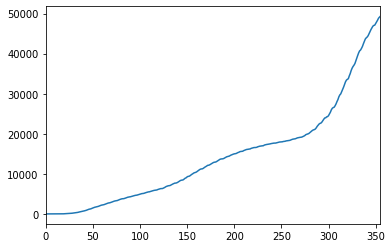

In [9]:
plot_col('death')

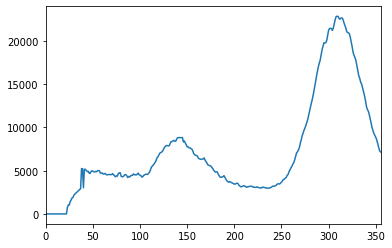

In [10]:
plot_col('hospitalizedCurrently')

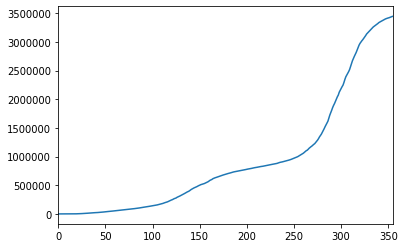

In [11]:
plot_col('positive')

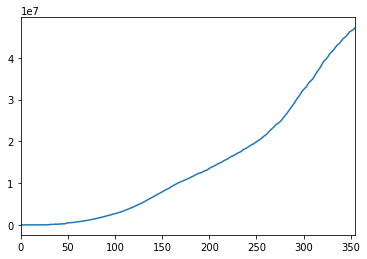

In [12]:
plot_col('totalTestResults')

In [13]:
df2 = df[['date', 'death', 'positive', 'totalTestResults', 'hospitalizedCurrently']].fillna(0)

In [14]:
df2

,date,death,positive,totalTestResults,hospitalizedCurrently
0,2021-02-22,49338.0,3446611,47320802,7165.0
1,2021-02-21,49105.0,3441946,47043348,7313.0
2,2021-02-20,48825.0,3435186,46813876,7747.0
3,2021-02-19,48344.0,3428518,46621654,8156.0
4,2021-02-18,47924.0,3421720,46504255,8566.0
...,...,...,...,...,...
351,2020-03-08,0.0,88,550,0.0
352,2020-03-07,0.0,69,531,0.0
353,2020-03-06,0.0,60,522,0.0
354,2020-03-05,0.0,53,515,0.0


In [18]:
df2.to_sql('covid_cases', con=cur, schema='public', index=False)

In [19]:
import flask_sqlalchemy

In [20]:
x = flask_sqlalchemy.SQLAlchemy()

In [31]:
x.Column(x.Dec)

NameError: name 'x' is not defined